In [3]:
import os
from PIL import Image
from random import sample, choices
import numpy as np

In [4]:
COL = 188 #指定拼接图片的列数
ROW = 126 #指定拼接图片的行数
UNIT_HEIGHT_SIZE = 256 #图片高度
UNIT_WIDTH_SIZE = 256 #图片宽度
PATH = "../level20_1931/" #需要拼接的图片所在的路径
NAME = "level20" #拼接出的图片保存的名字
DEAFULT_WHITE_PATH = "./test_img/0/0.jpg"
RANDOM_SELECT = False #设置是否可重复抽取图片
SAVE_QUALITY = 5 #保存的图片的质量 可选0-100

In [5]:
swiss_map = [[False for j in range(COL)] for i in range(ROW)]
min_row = 1000
max_row = 0
min_col = 1000
max_col = 0

In [6]:
for col in range(COL):
    for row in range(ROW):
        img_path = PATH + str(col) + '/' + str(row) + '.png'
        with Image.open(img_path) as f:
            num_img = np.asarray(f)
            if num_img.sum() != 0:
                min_col = min(min_col, col)
                min_row = min(min_row, row)
                max_col = max(max_col, col)
                max_row = max(max_row, row)
                swiss_map[row][col] = True
max_col = 0
for col in range(COL):
    img_path = PATH + str(col) + '/' + str(max_row) + '.png'
    with Image.open(img_path) as f:
        num_img = np.asarray(f)
        if num_img.sum() != 0:
            max_col = max(max_col, col)
print(min_col)
print(min_row)
print(max_col)
print(max_row)

23
18
160
112


In [10]:
#进行图片的复制拼接
from PIL import Image
def concat_images(name, path, min_col, min_row, max_col, max_row):
    target = Image.new('RGB', (UNIT_WIDTH_SIZE * (max_col - min_col + 1), UNIT_HEIGHT_SIZE * (max_row - min_row + 1)), 'white') #创建成品图的画布
    #第一个参数RGB表示创建RGB彩色图，第二个参数传入元组指定图片大小，第三个参数可指定颜色，默认为黑色
    for row in range(min_row, max_row + 1):
        for col in range(min_col, max_col + 1):
            img_path = path + str(col) + '/' + str(row) + '.png'
            if(os.path.exists(img_path)):
                with Image.open(img_path) as f:
                    target.paste(f, (0 + UNIT_WIDTH_SIZE*(col-min_col), 0 + UNIT_HEIGHT_SIZE*(row-min_row)))
                    # print("row: " + str(row) + "col: " + str(col))
            #对图片进行逐行拼接
            #paste方法第一个参数指定需要拼接的图片，第二个参数为二元元组（指定复制位置的左上角坐标）
            #或四元元组（指定复制位置的左上角和右下角坐标）
            
    target.save("./" + name + '.png', quality=SAVE_QUALITY) #成品图保存

In [13]:
#concatenate original fragment
# years = ["1890", "1899", "1904", "1909", "1915", "1920", "1925", "1935"]
years = ["1874", "1880", "1885"]
#first 67-85 69-99
#second 89-107 59-89
#third 68-89 129-159
if not os.path.exists("../second/"):
    os.mkdir("../second/")
for year in years:
    NAME = "../second/level20_{year}_original".format(year = year) #拼接出的图片保存的名字
    UNIT_HEIGHT_SIZE = 256 #图片高度
    UNIT_WIDTH_SIZE = 256 #图片宽度
    PATH = "../level20_{year}/".format(year = year) #需要拼接的图片所在的路径
    SAVE_QUALITY = 5 #保存的图片的质量 可选0-100
    min_row = 89
    max_row = 107
    min_col = 59
    max_col = 89
#拼接原始爬虫图片
    concat_images(NAME, PATH, min_col, min_row, max_col, max_row)

In [14]:
#crop with overlap
import os
from PIL import Image
from random import sample, choices
import numpy as np
# years = ["1874", "1880", "1885","1890", "1899", "1904", "1909", "1915", "1920", "1925", "1935"]
years = ["1874", "1880", "1885"]
folders = ["first", "second", "third"]
for folder in folders:
    prefix = "../{folder}/".format(folder = folder)
    for year in years:
        img_path = prefix + "level20_{year}_original.png".format(year = year)
        img_save_path = prefix + "level20_{year}/images/".format(year = year)
        # if os.path.exists(img_save_path):
        os.makedirs(img_save_path)
        img = Image.open(img_path)
        height, width, _ = np.array(img).shape
        gap = 768
        length = 1024
        for i in range(0, width - length + 1, gap):
            for j in range(0, height - length + 1, gap):
                img_region = img.crop((i, j, i+length, j+length))
                img_region.save(img_save_path + str(j) + "," + str(i) + ".png")

<AxesSubplot:xlabel='Year', ylabel='Ratio'>

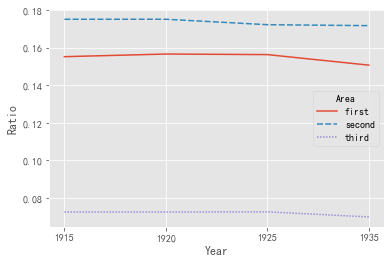

In [25]:
#compute glacier ratio
import os
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
years = ["1915", "1920", "1925", "1935"]
# ["1874", "1880", "1885", "1890", "1899", "1904"]
# , "1909", "1915", "1920", "1925", "1935"]
folders = ["first", "second", "third"]
res = {"Year": [], "Ratio": [], "Area":[]}
for folder in folders:
    prefix = "../{folder}/".format(folder = folder)
    for year in years:
        bimg_save_path = prefix + "level20_{year}_binary.png".format(year = year)
        img = Image.open(bimg_save_path)
        img = img.convert("1")
        img = np.array(img)
        ratio = img.sum()/img.size
        res["Year"].append(year)
        res["Area"].append(folder)
        res["Ratio"].append(round(ratio,4))
data = pd.DataFrame(res)
data
sns.lineplot(x="Year", y="Ratio",hue="Area", style="Area", data=data)


In [26]:
data

,Year,Ratio,Area
0,1915,0.1552,first
1,1920,0.1566,first
2,1925,0.1563,first
3,1935,0.1507,first
4,1915,0.1751,second
5,1920,0.1751,second
6,1925,0.1722,second
7,1935,0.1717,second
8,1915,0.0726,third
9,1920,0.0726,third


In [20]:
#concatnate with overlap
import os
from PIL import Image
import numpy as np
# years = ["1890", "1899", "1904", "1909", "1915", "1920", "1925", "1935"]
years = ["1874", "1880", "1885"]
folders = ["first","second","third"]
for folder in folders:
    prefix = "../{folder}/".format(folder = folder)
    for year in years:
        img_path = prefix + "level20_{year}_original.png".format(year = year)
        img_save_path = prefix + "level20_{year}_inferred.png".format(year = year)
        bimg_save_path = prefix + "level20_{year}_binary.png".format(year = year)
        frag_path = prefix + "level20_{year}_ocr/".format(year = year)
        binary_path = prefix + "level20_{year}_ocr/binary/".format(year = year)
        img = Image.open(img_path)
        height, width, _ = np.array(img).shape
        target = Image.new('RGB', (width, height), 'white')
        binary = Image.new('RGB', (width, height), 'white')
        for name in os.listdir(frag_path):
            if name == "binary": 
                continue
            with Image.open(frag_path + name) as f:
                [i, j] = name.split('.')[0].split(',')
                target.paste(f, (int(j),int(i)))
            with Image.open(binary_path + name) as f:
                [i, j] = name.split('.')[0].split(',')
                binary.paste(f, (int(j),int(i)))
        target.save(img_save_path)
        binary.save(bimg_save_path)

In [4]:
import os
from PIL import Image
from random import sample, choices
import numpy as np
# new_labels=np.load("./mod_labels_small_1931.npy")


# lf = Image.fromarray(new_labels)
img_path = "../1931_selected_1024_pics/1357.png"
label_path = "../1931_selected_1024_pics/label/1357.png"
f = Image.open(img_path)
f = f.convert('RGB')
lf = Image.open(label_path)
lf = lf.convert('RGB')
res = Image.blend(f, lf, 0.5)
res.save("./shili.png", quality=5) #成品图保存

In [2]:
import os
from PIL import Image
from random import sample, choices
import numpy as np
#进行图片的复制拼接
def concat_images(name, path, min_col, min_row, max_col, max_row):
    target = Image.new('RGB', (UNIT_WIDTH_SIZE * (max_col - min_col + 1), UNIT_HEIGHT_SIZE * (max_row - min_row + 1)), 'white') #创建成品图的画布
    #第一个参数RGB表示创建RGB彩色图，第二个参数传入元组指定图片大小，第三个参数可指定颜色，默认为黑色
    for row in range(min_row, max_row + 1):
        for col in range(min_col, max_col + 1):
            img_path = path + str(col) + '/' + str(row) + '.png'
            if(os.path.exists(img_path)):
                with Image.open(img_path) as f:
                    target.paste(f, (0 + UNIT_WIDTH_SIZE*(col-min_col), 0 + UNIT_HEIGHT_SIZE*(row-min_row)))
                    # print("row: " + str(row) + "col: " + str(col))
            #对图片进行逐行拼接
            #paste方法第一个参数指定需要拼接的图片，第二个参数为二元元组（指定复制位置的左上角坐标）
            #或四元元组（指定复制位置的左上角和右下角坐标）
            
    target.save("./" + name + '.png', quality=SAVE_QUALITY) #成品图保存

In [7]:
SAVA_ROOT = "./sample/" #拼接出的图片保存的名字
UNIT_HEIGHT_SIZE = 256 #图片高度
UNIT_WIDTH_SIZE = 256 #图片宽度
PATH = "../level20_1931/" #需要拼接的图片所在的路径
SAVE_QUALITY = 5 #保存的图片的质量 可选0-100
NUMBER = 1
for i in range(25, 156, 2):
    for j in range(20, 108, 2):
        concat_images(SAVA_ROOT + str(NUMBER), PATH, i, j, i+3, j+3)
        NUMBER += 1

In [38]:
import os
from PIL import Image
from random import sample, choices
import numpy as np
label_path = "./label/"
img_path = "../grey_data/ann/"
ori_path = "../1931_selected_1024_pics/"
des_path = "../grey_data/images/"
filename = os.listdir(label_path)
for i in filename:
    f = Image.open(label_path + str(i))
    f = f.convert('1')
    f.save(img_path + str(i))
    f = Image.open(ori_path + str(i))
    f = f.convert('L')
    f.save(des_path + str(i))

